**Renan Gonzales** — Nº USP **6473399**

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze5.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805
...,...,...,...,...,...,...
845,30,0,1,1,33.0,72.282306
846,4,1,1,0,29.0,31.734540
847,50,0,1,0,29.0,134.725193
848,29,0,0,0,41.0,75.382218


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [3]:
df.head()

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805


In [4]:
df.describe()

,nsneeze,alcohol,antihist,smoker,age,pollen
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,45.225882,0.408235,0.270588,0.188235,31.258824,59.425317
std,145.954955,0.491796,0.444525,0.391130,11.661553,31.022778
min,0.000000,0.000000,0.000000,0.000000,18.000000,6.876659
25%,9.000000,0.000000,0.000000,0.000000,19.000000,36.913786
50%,18.000000,0.000000,0.000000,0.000000,30.000000,54.628146
75%,37.000000,1.000000,1.000000,0.000000,39.000000,76.149298
max,3179.000000,1.000000,1.000000,1.000000,80.000000,210.301477


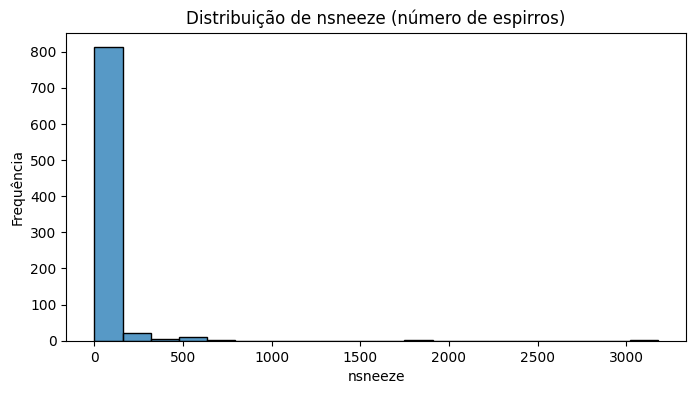

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(df['nsneeze'], bins=20, kde=False)
plt.title("Distribuição de nsneeze (número de espirros)")
plt.xlabel("nsneeze")
plt.ylabel("Frequência")
plt.show()

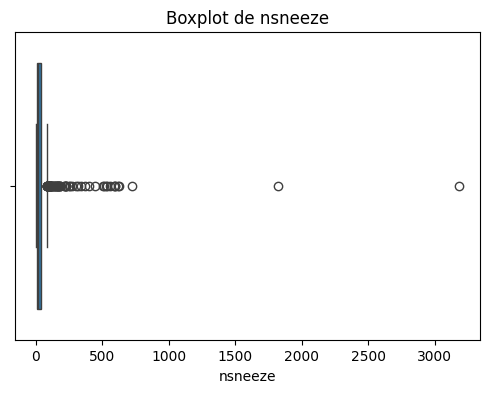

In [6]:

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['nsneeze'])
plt.title("Boxplot de nsneeze")
plt.xlabel("nsneeze")
plt.show()

Dada a presença de valores extremos, visualizaremos em escla log

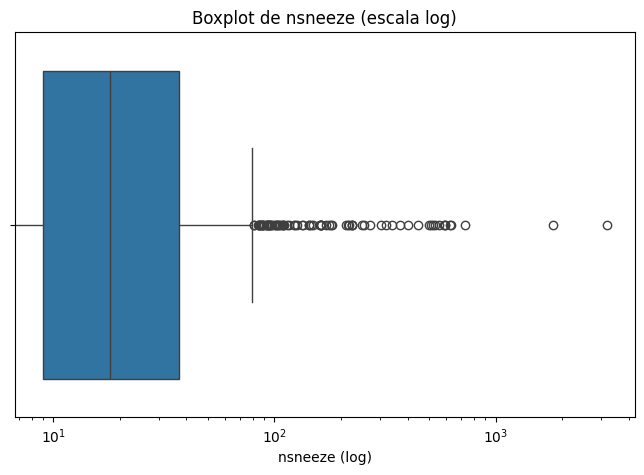

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['nsneeze'])
plt.xscale('log')
plt.title("Boxplot de nsneeze (escala log)")
plt.xlabel("nsneeze (log)")
plt.show()

In [8]:
mean_ns = df['nsneeze'].mean()
var_ns = df['nsneeze'].var()
print(f"Média de nsneeze: {mean_ns:.2f}")
print(f"Variância de nsneeze: {var_ns:.2f}")
print(f"Razão variância/média: {var_ns/mean_ns:.2f}")

Média de nsneeze: 45.23
Variância de nsneeze: 21302.85
Razão variância/média: 471.03



===== ALCOHOL =====
alcohol
0    503
1    347
Name: count, dtype: int64

Média de nsneeze por nível de alcohol
alcohol
0    34.405567
1    60.910663
Name: nsneeze, dtype: float64


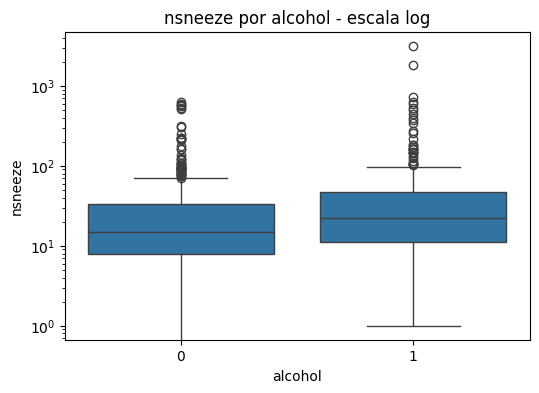


===== ANTIHIST =====
antihist
0    620
1    230
Name: count, dtype: int64

Média de nsneeze por nível de antihist
antihist
0    53.054839
1    24.121739
Name: nsneeze, dtype: float64


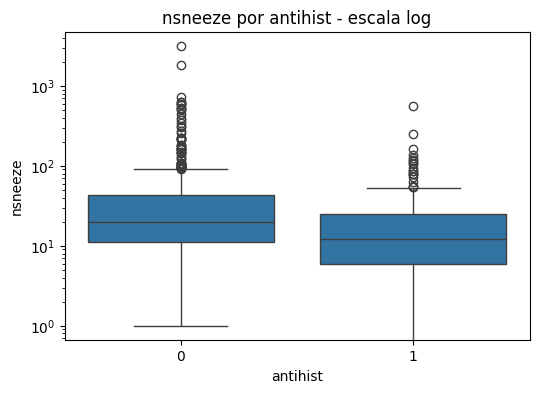


===== SMOKER =====
smoker
0    690
1    160
Name: count, dtype: int64

Média de nsneeze por nível de smoker
smoker
0    37.776812
1    77.350000
Name: nsneeze, dtype: float64


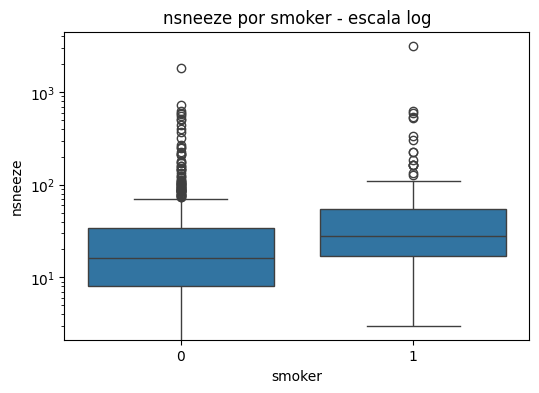

In [9]:
binary_vars = ['alcohol', 'antihist', 'smoker']

for var in binary_vars:
    print(f"\n===== {var.upper()} =====")
    print(df[var].value_counts())
    print("\nMédia de nsneeze por nível de", var)
    print(df.groupby(var)['nsneeze'].mean())

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=var, y='nsneeze', data=df)
    plt.title(f"nsneeze por {var} - escala log")
    plt.yscale('log')
    plt.xlabel(var)
    plt.ylabel("nsneeze")
    plt.show()

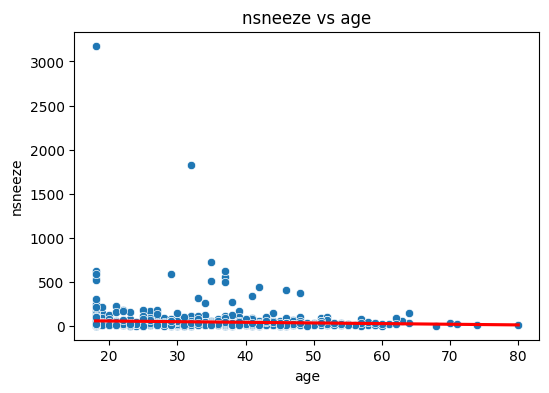

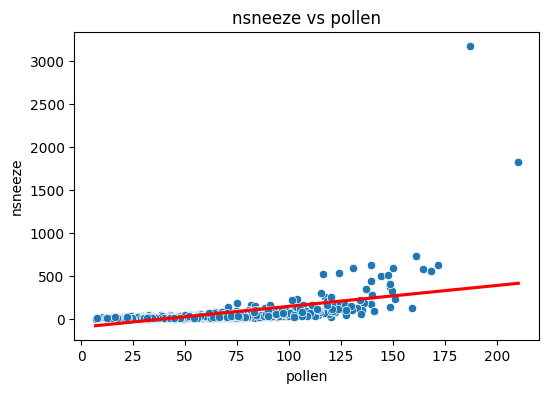


Correlação de Pearson com nsneeze:
          nsneeze       age    pollen
nsneeze  1.000000 -0.058721  0.516441
age     -0.058721  1.000000  0.024059
pollen   0.516441  0.024059  1.000000


In [10]:
cont_vars = ['age', 'pollen']

for var in cont_vars:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=var, y='nsneeze', data=df)
    sns.regplot(x=var, y='nsneeze', data=df, scatter=False, ci=None, color='red')
    plt.title(f"nsneeze vs {var}")
    plt.xlabel(var)
    plt.ylabel("nsneeze")
    plt.show()

print("\nCorrelação de Pearson com nsneeze:")
print(df[['nsneeze'] + cont_vars].corr())

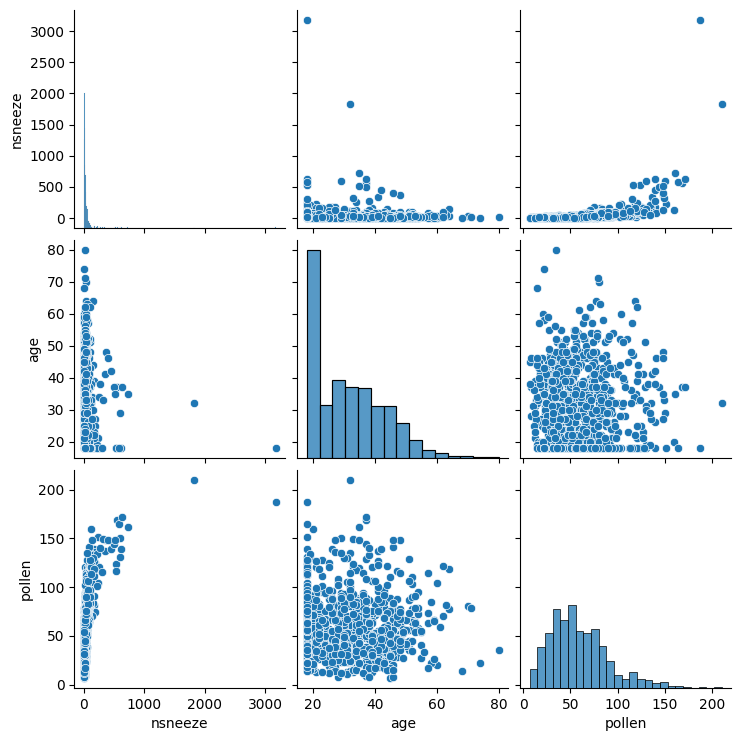

In [11]:
num_cols = ['nsneeze', 'age', 'pollen']
sns.pairplot(df[num_cols])
plt.show()

Resposta:

A variável resposta `nsneeze` apresenta forte assimetria, com valores extremos e razão variância/média muito elevada, indicando superdispersão. A maior parte das observações se concentra nos valores mais baixos, contudo há a presença de casa de milhares, também, o que afeta a escala das visualizações. Deixamos de os excluir em razão de não termos certeza da possibilidade de *Outliers*.

Sobre a correlação com as demais variáveis, inicia-se pelas binárias:
1. alcohol: indivíduos que consumiram álcool nas últimas 24h apresentam maior média de espirros (aproximadamente 61) em comparação aos que não consumiram (aproximadamente 34). Há indício de associação positiva entre consumo de álcool e maior frequência de espirros.

2. antihist: usuários de anti-histamínico têm média bem menor de espirros (aproximadamente 24) em relação aos não usuários (aproximadamente 53), indicando forte associação negativa, Em breve conclusão, trata-se do efeito esperado do medicamento.

3. smoker: fumantes exibem uma média aproximadamente duas vezes maior de espirros (aproximadamente 77) comparados aos não fumantes (aproximadamente 38), sugerindo associação positiva entre tabagismo e maior irritação nasal.

Variáveis contínuas:

1. age: a correlação é muito baixa e negativa (aproximadamente -0.06), e o gráfico sugere grande dispersão; portanto, não há evidência clara de associação relevante entre idade e número de espirros.

2. pollen: há uma correlação positiva moderada (aproximadamente 0.52) e gráfico com tendência crescente; ou seja, maior concentração de pólen aparenta estar relacionada a um maior número de espirros, sendo a relação contínua mais evidente.

Assim, a análise exploratória indica que `nsneeze` se associa principalmente a `pollen` (maior polinização pode levar a mais espirros) e a fatores comportamentais, como uso de anti-histamínico (redução) e tabagismo/álcool (aumento). Idade apresenta pouca relação.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [12]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [14]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5243.5
Date:                Fri, 28 Nov 2025   Deviance:                       6416.9
Time:                        22:48:39   Pearson chi2:                 6.61e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5704      0.021  

Resultados do Modelo de Regressão de Poisson

Primeiramente, ressalta-se que todos os valores são estatisticamente significativos, dado que o p-valor de cada variável é inferior a 5%.

Assim, para melhor explicação, segue tabela de cada valor de variável, bem como sobre a interpretação a ser retirada com base no e^β:

| Variável              | Coeficiente (β) | e^β (Razão de Contagem) | Interpretação |
|----------------------|-----------------|---------------------------|---------------|
| **Intercepto**       | 1.6008          | 4.96                      | Média base de espirros quando todas as covariáveis são 0. |
| **alcohol = 1**      | 0.3446          | 1.41                      | Consumiu álcool: aumento de **41%** nos espirros. |
| **antihist = 1**     | -0.6210         | 0.54                      | Usou anti-histamínico: redução de **46%** nos espirros. |
| **smoker = 1**       | 0.4918          | 1.64                      | Fumante: aumento de **64%** nos espirros. |
| **age**              | -0.0128         | 0.987                     | Cada ano reduz aproximadamente **1,3%** dos espirros. |
| **pollen**           | 0.0149          | 1.015                     | Cada unidade de pólen aumenta os espirros em **1,5%**. |




**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [15]:
# Calculando através do modelo de Pearson Qui-Quadrado
resid_pearson = ajuste_pois.resid_pearson

pearson_chi2 = np.sum(resid_pearson**2)
df_resid = ajuste_pois.df_resid
phi = pearson_chi2 / df_resid

print("Pearson Chi-Quadrado:", pearson_chi2)
print("DF residual:", df_resid)
print("Razão phi =", phi)

Pearson Chi-Quadrado: 6614.910299146382
DF residual: 844
Razão phi = 7.837571444486235


Para um modelo Poisson, espera-se que `Φ` seja aproximadamente 1. Contudo, o que se verifica é um valor em muito superior (aproximadamente 7.84). Assim, notório haver superdispersão.

In [16]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

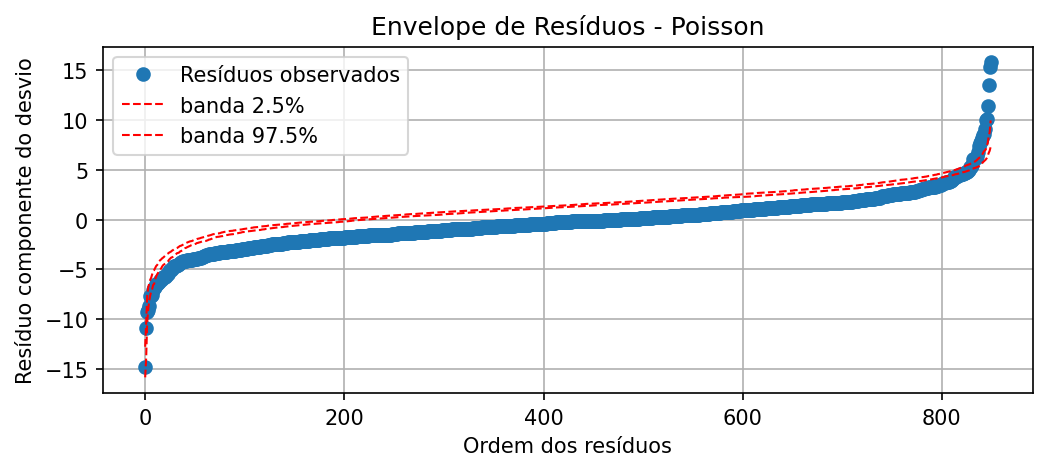

In [17]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

Conforme verificável no envelope, nota-se grave e frequente violação das bandas do gráfico em questão, sendo que quase na totalidade do gráfico há uma violação inferior e, ao fim, passa a ser superior. Assim, notável a superdispersão.

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3142.6
Date:                Fri, 28 Nov 2025   Deviance:                       777.09
Time:                        22:48:42   Pearson chi2:                     752.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9985
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4942      0.064  

In [19]:
print("\nDeviance Poisson:", ajuste_pois.deviance)
print("Deviance NB:", ajuste_nb.deviance)

print("\nAIC Poisson:", ajuste_pois.aic)
print("AIC NB:", ajuste_nb.aic)


Deviance Poisson: 6416.861057263796
Deviance NB: 777.0949027737793

AIC Poisson: 10499.065631732288
AIC NB: 6297.189432074626


In [20]:
resid_pearson_nb = ajuste_nb.resid_pearson
pearson_chi2_nb = np.sum(resid_pearson_nb**2)
phi_nb = pearson_chi2_nb / ajuste_nb.df_resid

print("Pearson Chi-square (NB):", pearson_chi2_nb)
print("DF residual:", ajuste_nb.df_resid)
print("Razão phi (NB):", phi_nb)

Pearson Chi-square (NB): 752.4628939682441
DF residual: 844
Razão phi (NB): 0.8915437132325167



| Métrica       | Poisson      | Binomial Negativa |
| ------------- | ------------ | ----------------- |
| Deviance      | **6416.86**  | **777.09**        |
| AIC           | **10499.07** | **6297.19**       |
| Pearson χ²/df | **≈ 7.8**    | **0.89**          |

Os valores mostram que o modelo de Poisson apresenta superdispersão severa (Pearson >> 1) e ajuste ruim (deviance e AIC muito elevados). Já a Binomial Negativa corrige a dispersão (φ aproximadamente 1) e apresenta melhor ajuste global.
Assim, a Binomial Negativa é claramente o modelo mais adequado para descrever nsneeze.

Para melhor compreensão das variáveis, segue:


| Variável | Poisson | NB          | Interpretação                |
| -------- | ------- | ----------- | ---------------------------- |
| alcohol  | 0.3446  | **0.3834**  | efeito positivo consistente  |
| antihist | -0.6210 | **-0.5992** | efeito protetor consistente  |
| smoker   | 0.4918  | **0.5612**  | maior efeito sob NB          |
| age      | -0.0128 | **-0.0101** | efeito negativo próximo      |
| pollen   | 0.0149  | **0.0301**  | efeito relativamente mais forte |


In [21]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


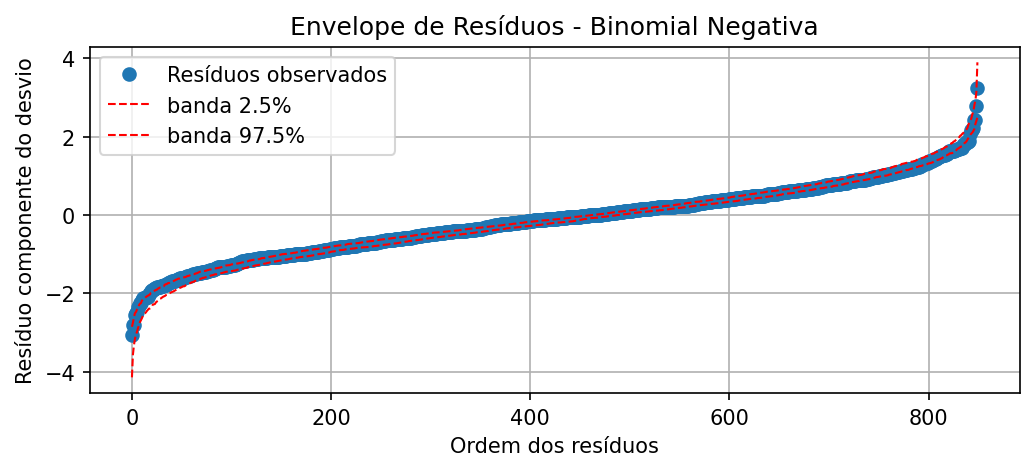

In [22]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

Em comparação com o modelo anterior, verifica-se comportamento mais adequado dos dados em relação ao envelope.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [23]:
marginais = ajuste_nb.get_margeff(at='overall', method='dydx')
marginais.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
         GLM Marginal Effects        
=====================================
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
====================================================================================
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     17.0874      1.764      9.684      0.000      13.629      20.546
C(antihist)[T.1]   -26.7061      2.132    -12.525      0.000     -30.885     -22.527
C(smoker)[T.1]      25.0117      2.188     11.429      0.000      20.723      29.301
age                 -0.4507      0.071     -6.379      0.000      -0.589      -0.312
pollen               1.3398      0.065     20.585      0.000       1.212       1.467
====================================================================================
"""

Com base no modelo da Binomial Negativa, mais adequado conforme exercício anterior, os efeitos marginais mostram que:

1. Consumo de álcool aumenta, em média, o número de espirros em aproximadamente 17 por dia, mantendo as demais variáveis constantes. Trata-se de um efeito crescente, significativo e clinicamente relevante.

2. Uso de anti-histamínico reduz, em média, o número de espirros em aproximadamente 27 por dia, também com alta significância. Portanto, o anti-histamínico exerce um efeito protetor forte e estatisticamente consistente.

Assim, o modelo indica que o álcool está associado a maior frequência de espirros, enquanto o anti-histamínico está associado a redução substancial no número médio de espirros.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
train, test = train_test_split(df, test_size=0.20, random_state=42)

In [27]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Poison
pois_model = smf.glm(
    formula=formula,
    data=train,
    family=sm.families.Poisson()
).fit()

# Binomial Negativa
nb_model = smf.glm(
    formula=formula,
    data=train,
    family=sm.families.NegativeBinomial()
).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [29]:
test["pred_pois"] = pois_model.predict(test)
test["pred_nb"] = nb_model.predict(test)

eqm_pois = mean_squared_error(test["nsneeze"], test["pred_pois"])
eam_pois = mean_absolute_error(test["nsneeze"], test["pred_pois"])

eqm_nb = mean_squared_error(test["nsneeze"], test["pred_nb"])
eam_nb = mean_absolute_error(test["nsneeze"], test["pred_nb"])

print("EQM - Poisson:", eqm_pois)
print("EAM - Poisson:", eam_pois)
print("EQM - NB:", eqm_nb)
print("EAM - NB:", eam_nb)

EQM - Poisson: 9617.626389826368
EAM - Poisson: 19.4886043354173
EQM - NB: 5871.886612547431
EAM - NB: 16.708826745470237


### Desempenho preditivo no conjunto de teste

| Modelo | EQM | EAM |
|--------|-----------|-----------|
| Poisson |  9617.6264   | 19.4886  |
| Binomial Negativa | 5871.8866 | 16.7088 |

### **Conclusão**

COnforme já havia a intuição anteriormente, a Binomial Negativa se confirmou como o menor EQM e menor EAM, de modo que apresenta melhor desempenho preditivo fora da amostra.

Novamente, o comportamento é consistente com os resultados de ajuste (deviance, AIC), os quais já demonstraram que Poisson sofre de superdispersão severa, enquanto a NB ajusta mais adequadamente a variabilidade dos dados.

Assim, tanto os critérios de ajuste quanto as métricas preditivas apontam para a Binomial Negativa como o modelo mais apropriado para descrever e prever o número de espirros.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [41]:
# dado não haver um valor específico, vamos nos basear nos dados para obter a estimativa de pólem
pollen_low = df["pollen"].quantile(0.10)
pollen_high = df["pollen"].quantile(0.90)

A = pd.DataFrame({
    "alcohol":[0],
    "antihist":[1],
    "smoker":[0],
    "age":[30],
    "pollen":[pollen_low]
})

B = pd.DataFrame({
    "alcohol":[1],
    "antihist":[0],
    "smoker":[1],
    "age":[50],
    "pollen":[pollen_high]
})

In [42]:
pred_A = nb_model.predict(A)[0]
pred_B = nb_model.predict(B)[0]

print("Previsão indivíduo A:", pred_A)
print("Previsão indivíduo B:", pred_B)

Previsão indivíduo A: 3.8654878841121363
Previsão indivíduo B: 162.23910428666736


O indivíduo A, com condições mais favoráveis (anti-histamínico + baixa polinização + sem álcool + não fumante), apresenta número esperado de espirros substancialmente menor.

O indivíduo B, com fatores agravantes (álcool + sem medicação + fumante + alta polinização), apresenta muito mais espirros esperados, conforme previsto pelo modelo.